## Alzheimer Disease

### Import libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
from scipy import stats

import warnings 

# Suppress all warnings
warnings.filterwarnings('ignore')

# Remove warning
warnings.simplefilter('ignore')


# Set option of DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.width', 100)

# Set theme for plotting
sns.set_theme(style='darkgrid', palette='coolwarm', rc={'figure.figsize' :(15,10)})


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [2]:
alzheimer_df = pd.read_csv("alzheimers_disease_data.csv")
alzheimer_df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [3]:
alzheimer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

### Categorical and Numerical features selection (manually)

In [4]:
# 18 categorical features
categorical_features = ['Gender',
                     'Ethnicity',
                     'EducationLevel',
                     'Smoking',
                     'FamilyHistoryAlzheimers',
                     'CardiovascularDisease',
                     'Diabetes',
                     'Depression',
                     'HeadInjury',
                     'Hypertension',
                     'MemoryComplaints',
                     'BehavioralProblems',
                     'Confusion',
                     'Disorientation',
                     'PersonalityChanges',
                     'DifficultyCompletingTasks',
                     'Forgetfulness',
                     'Diagnosis']

# 15 numerical features
numerical_features = ['Age',     
                      'BMI',
                      'AlcoholConsumption',
                      'PhysicalActivity',
                      'DietQuality',
                      'SleepQuality',
                      'SystolicBP',
                      'DiastolicBP',
                      'CholesterolTotal',
                      'CholesterolLDL',
                      'CholesterolHDL',
                      'CholesterolTriglycerides',
                      'MMSE',
                      'FunctionalAssessment',
                      'ADL']


alzheimer_df[numerical_features] = alzheimer_df[numerical_features].astype('float')
alzheimer_df[categorical_features] = alzheimer_df[categorical_features].astype('category')

### Remove irrelevant features

In [5]:
# Drop PatientID and DoctorInCharge
alzheimer_df.drop(inplace=True, columns={'DoctorInCharge', 'PatientID'})

alzheimer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        2149 non-null   float64 
 1   Gender                     2149 non-null   category
 2   Ethnicity                  2149 non-null   category
 3   EducationLevel             2149 non-null   category
 4   BMI                        2149 non-null   float64 
 5   Smoking                    2149 non-null   category
 6   AlcoholConsumption         2149 non-null   float64 
 7   PhysicalActivity           2149 non-null   float64 
 8   DietQuality                2149 non-null   float64 
 9   SleepQuality               2149 non-null   float64 
 10  FamilyHistoryAlzheimers    2149 non-null   category
 11  CardiovascularDisease      2149 non-null   category
 12  Diabetes                   2149 non-null   category
 13  Depression                 2149 n

### Numerical Features Exploration

In [6]:
alzheimer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840
SystolicBP,2149.0,134.264774,25.949352,90.000000,112.000000,134.000000,157.000000,179.000000
DiastolicBP,2149.0,89.847836,17.592496,60.000000,74.000000,91.000000,105.000000,119.000000
CholesterolTotal,2149.0,225.197519,42.542233,150.093316,190.252963,225.086430,262.031657,299.993352
CholesterolLDL,2149.0,124.335944,43.366584,50.230707,87.195798,123.342593,161.733733,199.965665


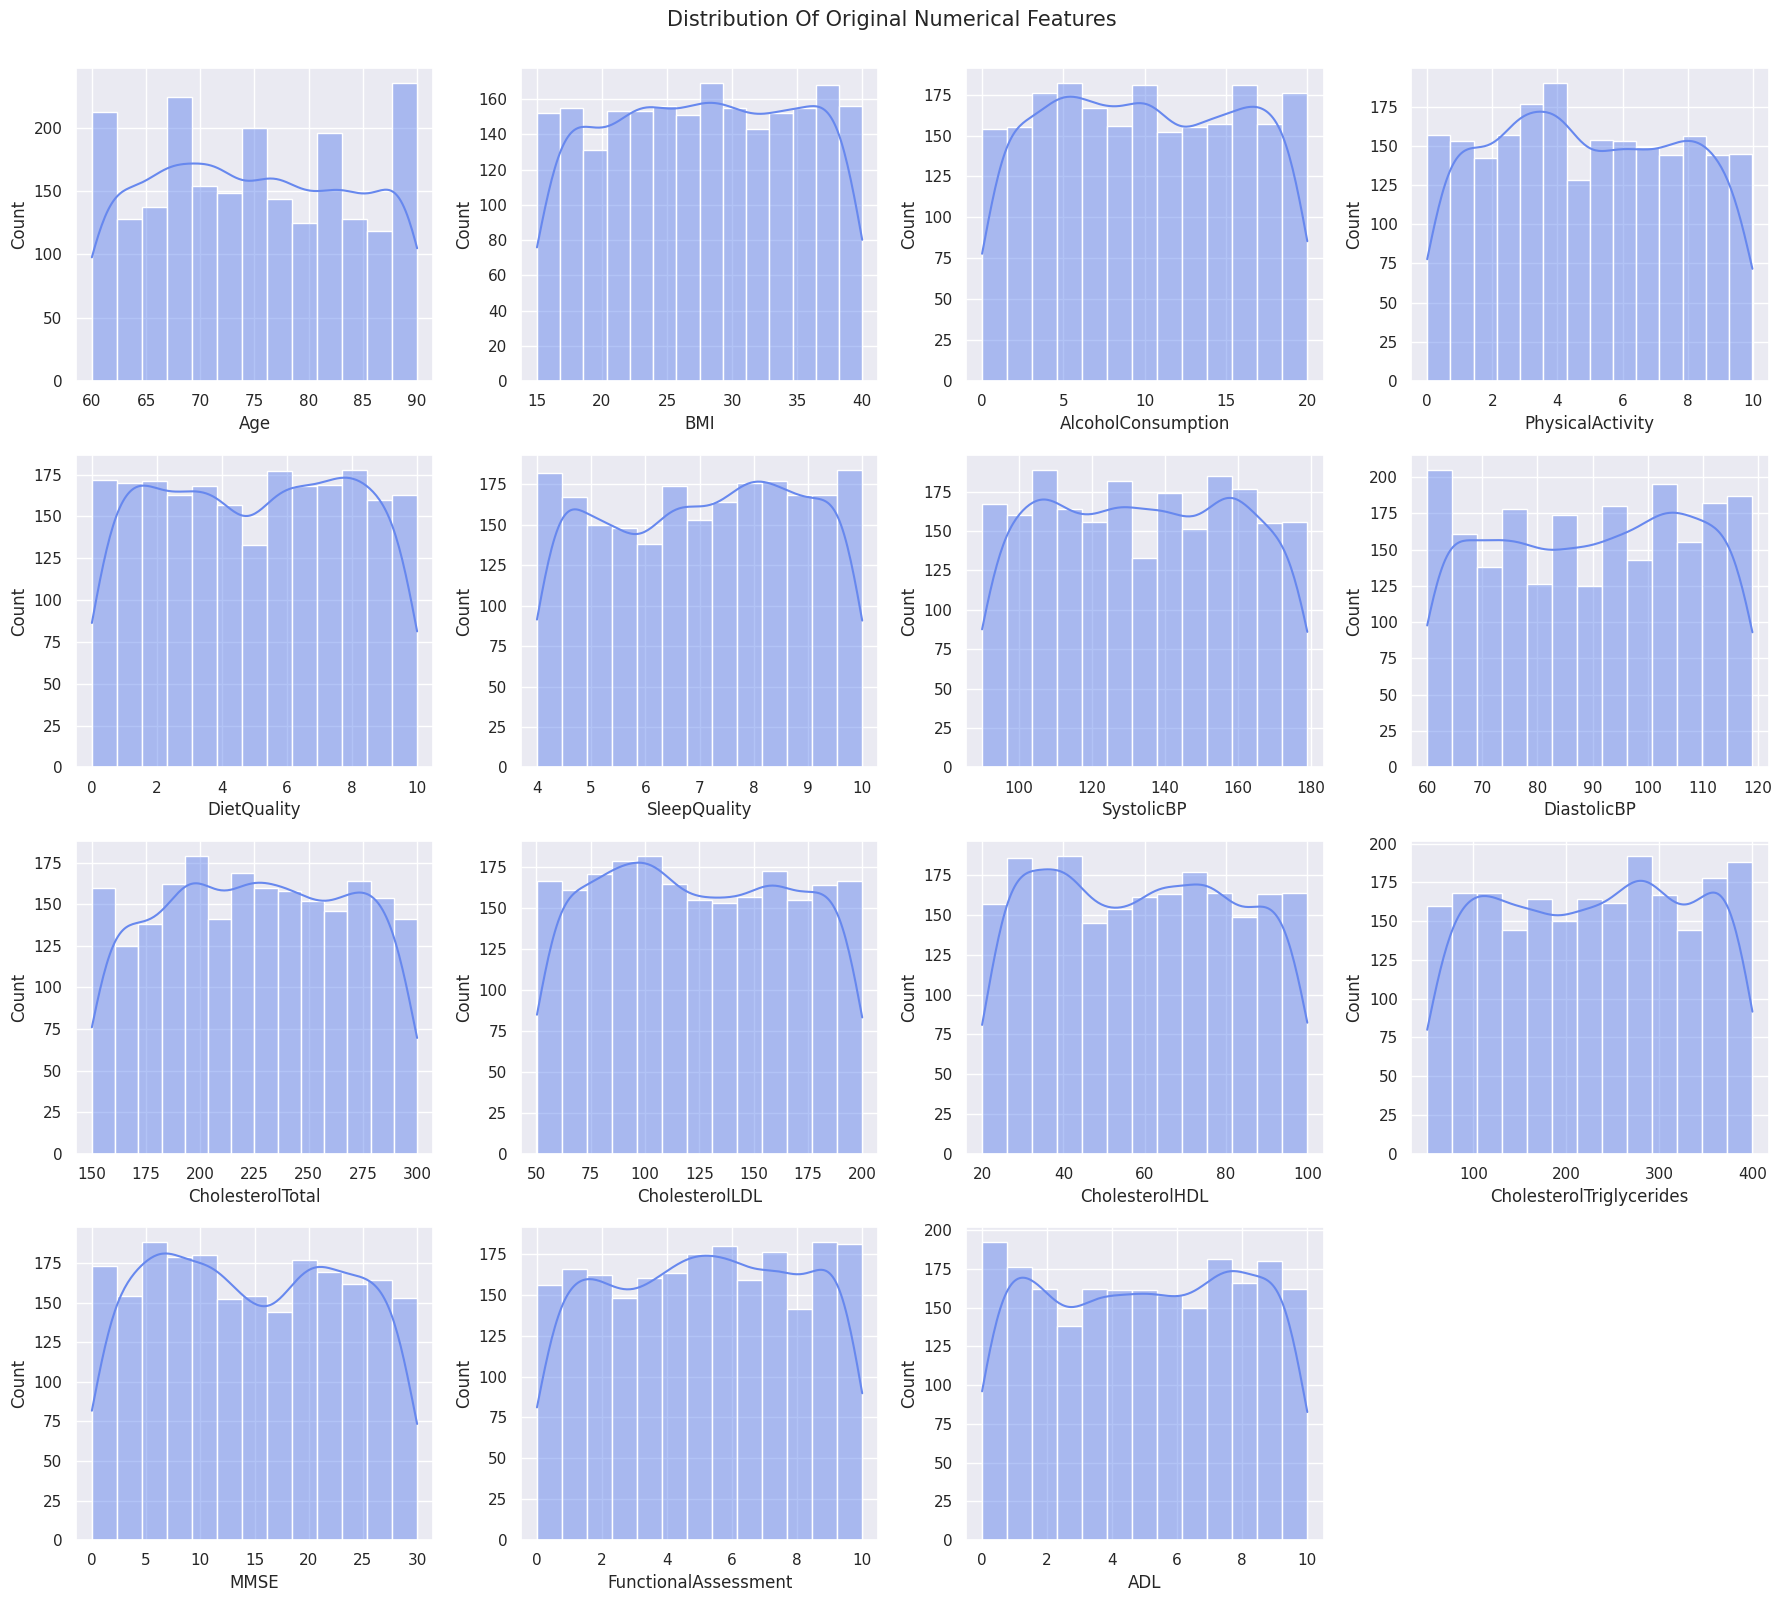

In [7]:

num_cols = 4
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))

axes = axes.ravel()

fig.suptitle("Distribution Of Original Numerical Features", y=1, fontsize=15)

for i, column in enumerate(numerical_features):

    ax = axes[i]
    sns.histplot(alzheimer_df[column], ax=ax, kde=True)

# Remove empty subplots if necessary
if len(numerical_features) < num_cols * num_rows:
    for i in range(len(numerical_features), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()


In [8]:
corr = alzheimer_df[numerical_features].corr()
corr

# sorted_columns = abs(alzheimer_df[])



,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
Age,1.000000,-0.015677,0.007323,-0.010249,-0.023386,0.049139,-0.005324,-0.004462,0.000392,0.003588,0.006803,-0.003062,-0.004235,0.005508,-0.038658
BMI,-0.015677,1.000000,-0.008997,0.000742,0.019922,-0.005975,-0.019275,-0.002524,0.001082,0.023684,0.038605,-0.018001,-0.003477,-0.030501,-0.009788
AlcoholConsumption,0.007323,-0.008997,1.000000,0.021696,0.020117,-0.003873,-0.030070,-0.008909,-0.033944,-0.017042,-0.001925,0.023362,-0.011424,-0.016483,-0.008250
PhysicalActivity,-0.010249,0.000742,0.021696,1.000000,0.011085,-0.001823,-0.004811,-0.010555,0.014335,0.017789,-0.001993,0.027416,-0.008342,-0.002419,-0.013324
DietQuality,-0.023386,0.019922,0.020117,0.011085,1.000000,0.051295,0.006031,0.009539,-0.016790,-0.023698,-0.008659,0.034734,0.021636,-0.009700,-0.007888
SleepQuality,0.049139,-0.005975,-0.003873,-0.001823,0.051295,1.000000,-0.027887,0.010797,0.006879,0.006751,0.015453,0.024004,0.012506,0.029589,0.014535
SystolicBP,-0.005324,-0.019275,-0.030070,-0.004811,0.006031,-0.027887,1.000000,0.002590,0.018537,-0.007295,0.002947,-0.034824,-0.003548,0.013161,0.015447
DiastolicBP,-0.004462,-0.002524,-0.008909,-0.010555,0.009539,0.010797,0.002590,1.000000,0.015249,-0.015542,0.008180,-0.007928,-0.028586,0.031485,-0.004836
CholesterolTotal,0.000392,0.001082,-0.033944,0.014335,-0.016790,0.006879,0.018537,0.015249,1.000000,0.010336,0.010116,-0.001959,-0.013638,-0.005345,0.000775
CholesterolLDL,0.003588,0.023684,-0.017042,0.017789,-0.023698,0.006751,-0.007295,-0.015542,0.010336,1.000000,-0.037148,-0.005582,0.025383,-0.016215,-0.019380


### Categorical features Exploration

In [9]:
alzheimer_df.describe(include='category').transpose()

,count,unique,top,freq
Gender,2149,2,1,1088
Ethnicity,2149,4,0,1278
EducationLevel,2149,4,1,854
Smoking,2149,2,0,1529
FamilyHistoryAlzheimers,2149,2,0,1607
CardiovascularDisease,2149,2,0,1839
Diabetes,2149,2,0,1825
Depression,2149,2,0,1718
HeadInjury,2149,2,0,1950
Hypertension,2149,2,0,1829


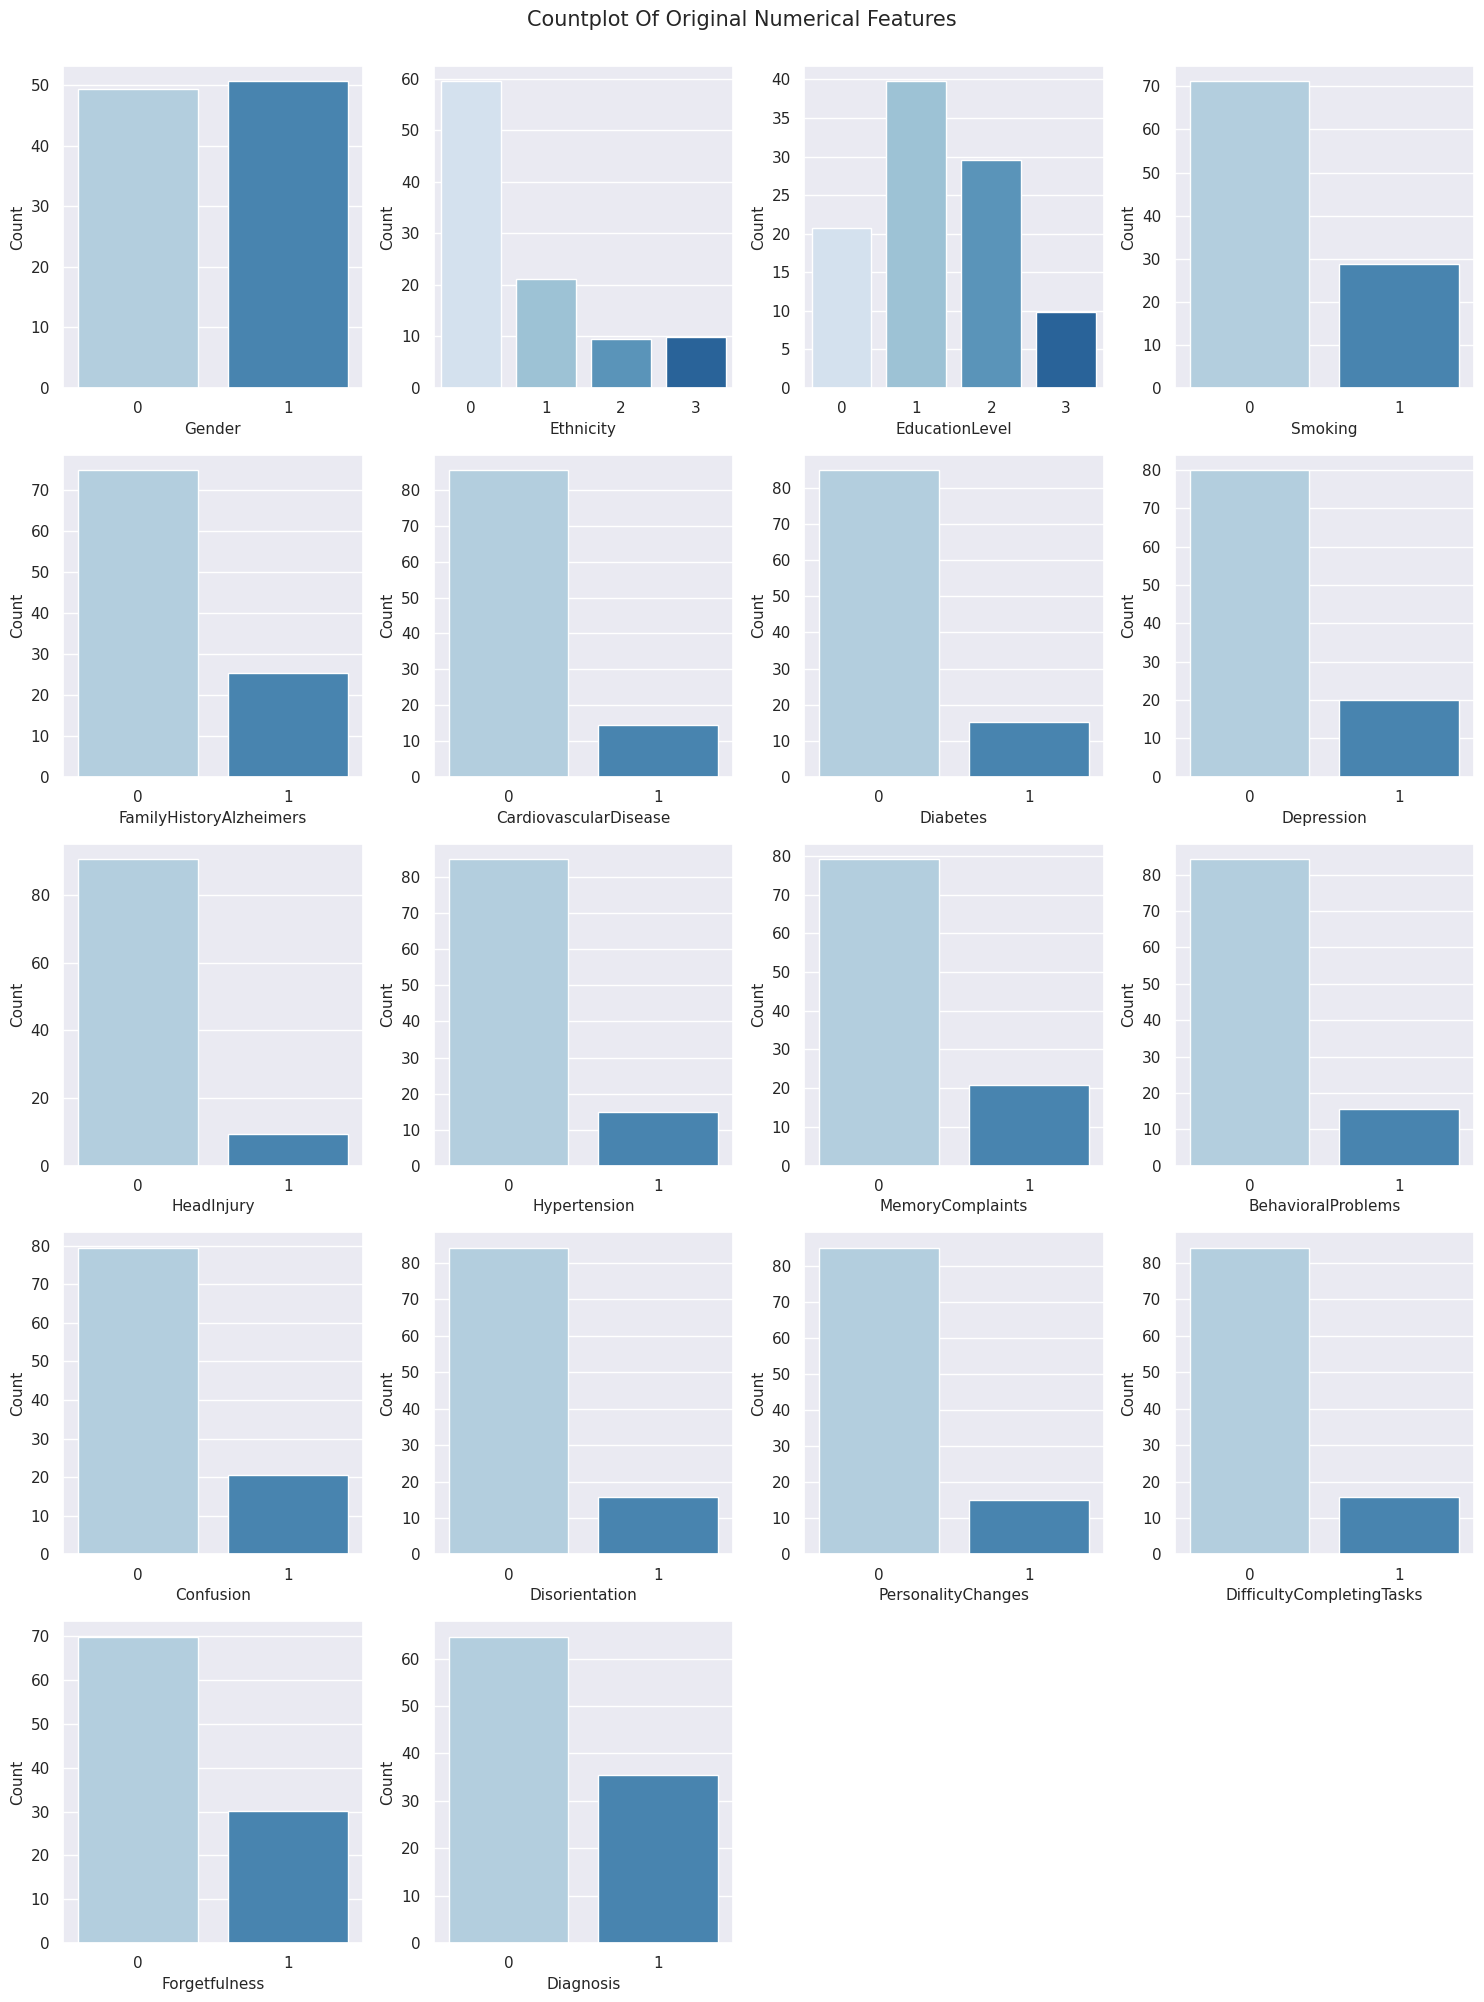

In [10]:

num_cols = 4
num_rows = (len(categorical_features) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

axes = axes.ravel()

fig.suptitle("Countplot Of Original Numerical Features", y=1, fontsize=15)

for i, column in enumerate(categorical_features):

    ax = axes[i]
    sns.countplot(data=alzheimer_df, 
                  x=column, ax=ax, 
                  palette='Blues', 
                #   hue=alzheimer_df['Diagnosis'], 
                  stat='percent')
    ax.set_xlabel(column, fontsize=11)
    ax.set_ylabel('Count', fontsize=11)
    # ax.set_xticks((alzheimer_df))


# Remove empty subplots if necessary
if len(categorical_features) < num_cols * num_rows:
    for i in range(len(categorical_features), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()


## Preprocessing Data

In [11]:
X = alzheimer_df.drop(columns={'Diagnosis'})
y = alzheimer_df[['Diagnosis']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=0.2)

### Rescaling Numerical Features

In [12]:
scalar = StandardScaler()

X_train[numerical_features] = scalar.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scalar.transform(X_test[numerical_features])

In [21]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1719.0,-4.546812e-16,1.000291,-1.632040,-0.858176,-0.084313,0.910655,1.684518
BMI,1719.0,2.521414e-16,1.000291,-1.730587,-0.859530,0.031992,0.866127,1.694605
AlcoholConsumption,1719.0,-1.550050e-16,1.000291,-1.739898,-0.852769,-0.018474,0.893505,1.715682
PhysicalActivity,1719.0,2.046065e-16,1.000291,-1.720415,-0.832827,-0.039091,0.876590,1.765957
DietQuality,1719.0,1.839392e-16,1.000291,-1.702795,-0.876829,0.007075,0.878838,1.720900
SleepQuality,1719.0,2.190737e-16,1.000291,-1.740707,-0.885486,0.041619,0.852890,1.662806
SystolicBP,1719.0,4.061130e-16,1.000291,-1.725278,-0.872415,-0.019552,0.872077,1.724940
DiastolicBP,1719.0,3.895791e-16,1.000291,-1.690993,-0.895819,0.012952,0.864925,1.660099
CholesterolTotal,1719.0,-2.686753e-17,1.000291,-1.734113,-0.837930,-0.003166,0.876878,1.769231
CholesterolLDL,1719.0,3.306772e-16,1.000291,-1.730163,-0.853445,-0.027337,0.852868,1.754044


## Modeling

In [13]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

model_svc = SVC(kernel='rbf', C=10)
model_svc.fit(X_train, y_train)

y_pred = model_svc.predict(X_test)



In [14]:
print((classification_report(y_pred, y_test)))


              precision    recall  f1-score   support

           0       0.90      0.85      0.88       302
           1       0.69      0.79      0.74       128

    accuracy                           0.83       430
   macro avg       0.80      0.82      0.81       430
weighted avg       0.84      0.83      0.84       430



In [15]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
y_pred = model_logistic.predict(X_test)

In [16]:
print((classification_report(y_pred, y_test)))


              precision    recall  f1-score   support

           0       0.93      0.86      0.90       308
           1       0.71      0.84      0.77       122

    accuracy                           0.86       430
   macro avg       0.82      0.85      0.83       430
weighted avg       0.87      0.86      0.86       430



In [17]:
model_logistic = GaussianNB()
model_logistic.fit(X_train, y_train)
y_pred = model_logistic.predict(X_test)

In [18]:
print((classification_report(y_pred, y_test)))


              precision    recall  f1-score   support

           0       0.85      0.82      0.83       294
           1       0.63      0.68      0.65       136

    accuracy                           0.77       430
   macro avg       0.74      0.75      0.74       430
weighted avg       0.78      0.77      0.77       430



In [19]:
model_logistic = RandomForestClassifier()
model_logistic.fit(X_train, y_train)
y_pred = model_logistic.predict(X_test)

In [20]:
print((classification_report(y_pred, y_test)))


              precision    recall  f1-score   support

           0       0.97      0.92      0.95       299
           1       0.84      0.94      0.89       131

    accuracy                           0.93       430
   macro avg       0.91      0.93      0.92       430
weighted avg       0.93      0.93      0.93       430

